# Text Analysis (starter)
                                            Nom Prenom
                                            EPFL

# 1. Introduction to Natural Language Processing (NLP)

Welcome to this gentle introduction to Natural Language Processing (NLP)! In this Jupyter notebook, we'll dive into the fascinating world of NLP, learn its fundamentals, and take some initial steps to analyze and process text data.


<figure>
    <center>
    <img src="images/classification.jpeg" width="400" height="600">
    <figcaption>Source: <a href="https://www.freecodecamp.org/news/chihuahua-or-muffin-my-search-for-the-best-computer-vision-api-cbda4d6b425d/">Link</a></figcaption>
    </center>
</figure>

___What is NLP?___

Natural Language Processing, commonly referred to as NLP, is a branch of artificial intelligence that focuses on the interaction between computers and humans through natural language. The ultimate goal of NLP is to enable computers to understand, interpret, and generate human language in a manner that is both valuable and meaningful.

___Why is NLP Important?___

With the explosion of data in today's world, a significant chunk of this data is unstructured text. From emails and tweets to news articles and documents, text data is everywhere. NLP allows us to analyze this text, derive insights, create chatbots, automatic summarizers, and even machine translation tools.

___Key NLP Tasks___

Tokenization: Breaking text into words or sentences.
Stopword Removal: Removing common words that may not add much value in text analysis.
Stemming and Lemmatization: Reducing words to their base or root form.
Named Entity Recognition (NER): Identifying entities such as person names, organizations, locations in the text.
Sentiment Analysis: Determining the sentiment or emotion behind a piece of text.
Machine Translation: Translating text from one language to another.
... and many more!

___First Steps___

<figure>
    <center>
    <img src="images/text_processing_flow.png" width="700" height="100">
    <figcaption>Source: <a href="https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/">Link</a></figcaption>
    </center>
</figure>



# 2. Récupération, Prétraitement et Exploration du corpus de textes


### 2. 1. General Context

The portrayal of climate change in news media from 1800 to 2000 offers an interesting study into the evolving nature of both scientific understanding and public sentiment regarding this crucial topic. As we explore the timeline, it's essential to understand that both the terminology and public consciousness around climate change underwent significant shifts. The title of Gazette de Lausanne was adopted in 1803. The newspaper was absorbed by the Journal de Genève in 1991. Here's a broad overview:
    1. 1800s to Early 1900s: Scientific Observations and Curiosities
Pre-Industrial Period: There wasn't much public awareness about climate change during this period. However, some scientists began noting and speculating about possible shifts in global climates based on localized observations.
Late 19th Century: Scientists like John Tyndall began researching the greenhouse effect, and Svante Arrhenius suggested that human-made carbon dioxide could enhance this effect, suggesting that a doubling of the CO2 concentration would lead to a 5oC temperature rise, leading to global warming.
    2. Mid 1900s: Increasing Scientific Interest & Emergence in Media
1950s: Gilbert Plass, a Canadian physicist, concluded that human activity could lead to a doubling of atmospheric CO2, leading to a significant rise in global temperatures. Charles David Keeling started measuring atmospheric CO2 at Mauna Loa, Hawaii, leading to the famous "Keeling Curve," which showed an upward trend. He discovered CO2 levels are highest in the spring, when decomposing plant matter releases CO2 into the air, and are lowest in autumn when plants stop taking in CO2 for photosynthesis.
1960s: Newspapers began reporting more frequently on the issue, especially after certain events, such as Earth Day in 1970. Still, the topic wasn't yet mainstream.
1970s: During this period, there was some debate in scientific circles about whether the earth was heading towards global warming or a new ice age. The media often reported on both, sometimes leading to public confusion. However, by the end of the decade, the consensus was leaning more towards global warming.
    3. Late 1900s: Mainstream Attention and Political Movements
1980s: This decade marked a significant shift, with climate change becoming a mainstream media topic. Reports of shrinking polar ice caps, rising global temperatures, and clear connections to human activity made headlines. The United Nations established the Intergovernmental Panel on Climate Change (IPCC) in 1988, further highlighting the issue's urgency.

1990s: Climate change became increasingly political. 
The 1992 Rio Earth Summit and the 1997 Kyoto Protocol were significant international efforts to address global warming. The primary aims of the Protocol are the stabilisation of greenhouse gas levels, whilst also setting objectives for reducing gas emissions in those countries with the highest levels. The media began covering the topic not just as a scientific issue but also as a political, economic, and even moral one.

***Noteworthy Considerations:***
Terminology: Terms like "global warming" and "climate change" weren't always used in the way we understand them today. Earlier articles might have used terms like "changing climates" or "greenhouse effect."
Localization: News in earlier periods often focused on local or regional climate phenomena, which might not have been recognized as part of a larger global trend.
Sociopolitical Influence: Especially in the latter half of the 20th century, climate change reporting in the media was also influenced by political ideologies and economic interests, which sometimes led to polarized perspectives.
In summary, while climate change as a concept existed in scientific circles from the late 19th century, it took until the latter half of the 20th century to become a mainstream media topic. Over time, the discourse evolved from mere scientific curiosity to an urgent global crisis that demanded collective action.


In [ ]:
import os
import bz2
import time
import json
from tqdm import tqdm

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# If you're not in a Jupyter environment
tqdm.pandas()

# Define the path to the directory: in this case, Gazette de Lausanne
NEWSPAPER_FOLDER = 'data/GDL'

data = []

# To get the total number of bz2 files beforehand (for accurate progress bar)
total_files = sum(1 for _, _, filenames in os.walk(NEWSPAPER_FOLDER) for f in filenames if f.endswith('.bz2'))

idx = 0
# Walk through the directory
file_time_start = time.time()
for dirpath, dirnames, filenames in os.walk(NEWSPAPER_FOLDER):
    for filename in tqdm(filenames, total=total_files, desc="Reading files"):
        # Check if the file has a .bz2 extension
        if filename.endswith('.bz2'):
            filepath = os.path.join(dirpath, filename)
            
            # Open and read the compressed file
            year_data = []
            with bz2.open(filepath, 'rt') as file:
                for line in file:
                    line = json.loads(line)
#                     print(line)
                    if 'ft' in line:
x                        # file format: GDL-1986.jsonl.bz2
                        data.append({'date': line['d'], 'text': line['ft'], 'type': line['tp']})
            
    
    print(f'Number of files in {dirpath}: {len(filenames)}. Time taken to read files: {time.time() - file_time_start}')



Reading files:   0%|                                                                                                                                                                                                                                                 | 0/3 [00:00<?, ?it/s]

> /var/folders/rv/x6hk7f3j7dzb763m4m3kgmb00000gp/T/ipykernel_41042/2346462188.py(41)<module>()
     39                         import pdb;pdb.set_trace()
     40                         # file format: GDL-1986.jsonl.bz2
---> 41                         data.append({'date': line['d'], 'text': line['ft']})
     42 
     43 

ipdb> line
{'id': 'GDL-1846-07-07-a-i0001', 'pp': [1, 2], 'd': '1846-07-07', 'olr': True, 'ts': '2019-10-08T12:25:42Z', 'lg': 'fr', 'tp': 'ar', 's3v': None, 'ppreb': [{'id': 'GDL-1846-07-07-a-p0001', 'n': 1, 't': [{'c': [282, 673, 452, 52], 's': 0, 'l': 13}, {'c': [752, 673, 185, 52], 's': 14, 'l': 6}, {'c': [427, 747, 165, 33], 's': 21, 'l': 9}, {'c': [607, 747, 55, 33], 's': 31, 'l': 3}, {'c': [672, 747, 138, 33], 's': 35, 'l': 7}, {'c': [805, 747, 8, 33], 's': 42, 'l': 1}, {'c': [157, 793, 78, 40], 's': 44, 'l': 4}, {'c': [253, 793, 45, 40], 's': 49, 'l': 3}, {'c': [310, 793, 130, 40], 's': 53, 'l': 7}, {'c': [460, 793, 40, 40], 's': 61, 'l': 2}, {'c': [522, 793, 2

ipdb> line.keys()
dict_keys(['id', 'pp', 'd', 'olr', 'ts', 'lg', 'tp', 's3v', 'ppreb', 'lb', 'cc', 't', 'pb', 'rb', 'ft'])


In [2]:
data[0]

{'date': '1846-07-07',
 'text': 'CONFÉDÉRATION SUISSE NOUVELLES DES CANTONS. tous les évoques de la Suisse ont adressé à la diète une pétition concernant la suppression des couvens, l\'administration par l\'état de leurs biens et les lois portées sur le noviciat. — Ensuite d\'une lettre adressée de Lucerne au gouvernement de Zug, annonçant qu\'une conférence des sept cantons était convoquée pour le 5 juillet, le conseil cantonal de Zoug s\'est assemblé le 2 et a décidé, à une rité de 54 voix contre 4 de prendre part à cette réunion. Il a ensuite chargé MM. Hegglin et Bossard d\'assister à cette ÎISSGHI 1) 1 GG — Le conseil cantonal de Glaris s\'est occupé le 1 juillet des instructions pour la diète et il a décidé : 1° Que Glaris maintiendrait sa proposition d\'ajourner le camp de Thoune jusqu\'en 1848 ; — 2° Que le différend entre Vaud * et Fribourg, concernant la souveraineté sur le lac de Morat, devait être soumis au droit fédéral ; — 5° De renoua vêler les instructions de l\'année d

In [3]:
import pandas as pd # read about pandas library

In [4]:
# Transform the data into a pandas dataframe

data = pd.DataFrame.from_dict(data)

In [5]:
data.head() # afficher les 5 premières lignes

,date,text
0,1846-07-07,CONFÉDÉRATION SUISSE NOUVELLES DES CANTONS. to...
1,1846-07-07,"Une ordonnance royale, communiquée le 5 aux de..."
2,1846-07-07,UN PASTEUR in FEUILLETON DELA GAZETTE DE LAUSA...
3,1846-07-07,AVI ^ Le conseil communal de Payerne ayant déc...
4,1846-07-07,GAZETTE DE ET JOURNAL SUISSE.


In [6]:
data.tail() # afficher les 5 dernières lignes

,date,text
60575,1990-05-22,
60576,1990-05-22,
60577,1990-05-22,
60578,1990-05-22,
60579,1990-05-22,


In [7]:
data['year'] = data['date'].apply(lambda x: int(x[:4]))
data['month'] = data['date'].apply(lambda x: int(x[5:7]))
data['day'] = data['date'].apply(lambda x: int(x[8:]))

In [8]:
data.head()

,date,text,year,month,day
0,1846-07-07,CONFÉDÉRATION SUISSE NOUVELLES DES CANTONS. to...,1846,7,7
1,1846-07-07,"Une ordonnance royale, communiquée le 5 aux de...",1846,7,7
2,1846-07-07,UN PASTEUR in FEUILLETON DELA GAZETTE DE LAUSA...,1846,7,7
3,1846-07-07,AVI ^ Le conseil communal de Payerne ayant déc...,1846,7,7
4,1846-07-07,GAZETTE DE ET JOURNAL SUISSE.,1846,7,7


With Pandas, we can start with some simple stats. Subsequent results will be in descending order so that the first item is the most frequent item.

In [9]:
data.year.value_counts()

1990    57491
1798     1565
1846     1524
Name: year, dtype: int64

With Pandas we can also visualize these statistics.

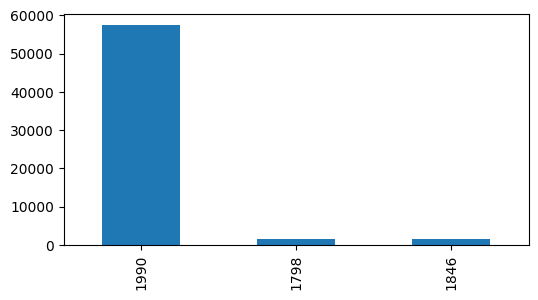

In [11]:
import matplotlib.pyplot as plt

# ... your data processing ...

# Before plotting, set the size using `figsize` argument
ax = data.year.value_counts().plot(kind='bar', figsize=(6,3))  # Adjust (12,8) as needed

plt.show()  # Display the plot


### 2.2 Pré-traitement de texte 

Dans tout processus d'analyse de texte, la première et la plus importante des étapes est de **constituer un corpus**, un ensemble de documents, et de **le nettoyer** afin de l'exploiter. 

Les étapes de prétraitement (*preprocessing*) sont cruciales car elles permettent de **nettoyer le texte** de tous ses éléments qui ne sont **pas porteurs de sens**, et le préparent pour l’analyse.
Les différentes étapes sont :
1. La ***tokenisation*** est un moyen de séparer un morceau de texte en unités plus petites appelées **tokens**. Les **tokens** sont généralement des **mots**.

2. La ***normalisation*** du texte est importante pour les textes bruyants comme par exemple ces données. qui sont des documents numérisés qui, comme nous l'avons vu, contiennent de nombreuses erreurs: les **abréviations**, les **fautes d'orthographe** et l'utilisation de mots hors vocabulaire (oov) sont répandus. Ce procédé implique également la **suppression des mots vides** ou des **mots bruyants** qui peuvent perturber l'analyse (conjugaisons, majuscules, ponctuations, etc.).

**Note**: en analyse de données, ces étapes sont généralement les plus fastidieuses, car elle impliquent un long travail de normalisation de données.

Nous allons utiliser les bibliothèques de traitement du langage [`nltk`](https://www.nltk.org/), [`spaCy`](https://spacy.io) ainsi que les bibliothèques scientifiques classiques que sont [`pandas`](https://pandas.pydata.org/), [`numpy`](https://numpy.org/). La bibliothèque [`spaCy`](https://spacy.io) nous permet d'obtenir ces informations facilement.

PS: l'installation de cette bibliothèque est très simple dans envirement virtuel (ou ici, dans le notebook):

```
!pip install spacy
!python -m spacy download fr_core_news_sm```

In [ ]:
!pip install spacy


In [ ]:
!python -m spacy download fr_core_news_sm

### 2.2.1 Suppression des [mots vides](https://fr.wikipedia.org/wiki/Mot_vide) (stopwords)

La première manipulation souvent effectuée dans le traitement du texte est la suppression des mots vides, ou *stopwords*. Ce sont les mots très courants dans la langue étudiée (« the », « a », en anglais) qui dans beaucoup des cas **n'apportent pas de valeur informative** pour la compréhension d’un document ou d’un corpus. 

Par exemple, dans le contexte d'un système de recherche, si votre requête de recherche est «Qu'est-ce que le prétraitement de texte ?», vous voulez que le système de recherche se concentre sur les documents qui parlent de «prétraitement de texte» plutôt que sur les documents qui parlent de «Qu'est-ce que le». Cela peut être fait en empêchant tous les mots de votre liste de mots vides d'être analysés. Les mots vides sont couramment appliqués dans les systèmes de recherche, les applications de classification de texte, la modélisation de sujets, l'extraction de sujets et autres.

Par contre, la suppression des mots vides, bien qu'efficace dans les systèmes de recherche et d'extraction de sujets, s'est avérée non critique dans les algorithmes de classification and ils sont assez importants dans la création d'un [**modèle de langage**](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28) dans lequel le sens d'un mot dépend de tous les mots environnants. Cependant, cela aide à réduire le nombre de fonctionnalités prises en compte, ce qui permet de garder vos modèles de taille décente.

In [12]:
import spacy
import string

nlp = spacy.load("fr_core_news_sm") # charge le modèle en anglais

spacy_stopwords = list(spacy.lang.fr.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

spacy_stopwords[:10], punctuation[:10]

/Users/eboros/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


(['tout',
  'à',
  'auraient',
  'eux',
  'plutot',
  'notre',
  'comment',
  'j’',
  'miennes',
  'différente'],
 ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

In [13]:
print(spacy_stopwords)

['tout', 'à', 'auraient', 'eux', 'plutot', 'notre', 'comment', 'j’', 'miennes', 'différente', 'dessus', 'soi-même', 'vé', 'du', 'soit', 'voilà', 'tente', 'quelque', 'nombreux', 'sienne', 'anterieures', 'quel', 'retour', 'septième', 'plus', 'ait', 'derrière', 'cela', 'certain', 'suis', 'néanmoins', 'seront', 'te', 'jusqu', 'plusieurs', 'celles', 'environ', 'vôtre', 'devra', "l'", 'surtout', 'semblaient', 'importe', 'directement', 'celles-ci', 'fais', 'personne', 'pourrait', 'laquelle', 'nous-mêmes', 'proche', 'quatrièmement', 'aurait', 'avait', 'douze', "j'", 'certains', 'cinquantaine', 'vu', 'pu', 'ouvert', 'dite', 'alors', 'elle-meme', 'desormais', 'partant', 'ha', 'onze', 'etre', 'également', 'troisième', 'directe', 'dix-huit', 'revoici', 'parlent', 'tiens', 'elle-même', 'seule', 'doivent', 'antérieures', 'ès', 'semble', 'differents', 'tels', 'n’', 'quarante', 'puisque', 'meme', 'precisement', 'auquel', 'pourquoi', 'suivants', 'aura', 'possibles', 'â', 'préalable', 'effet', 'font', '

In [14]:
data.head()

,date,text,year,month,day
0,1846-07-07,CONFÉDÉRATION SUISSE NOUVELLES DES CANTONS. to...,1846,7,7
1,1846-07-07,"Une ordonnance royale, communiquée le 5 aux de...",1846,7,7
2,1846-07-07,UN PASTEUR in FEUILLETON DELA GAZETTE DE LAUSA...,1846,7,7
3,1846-07-07,AVI ^ Le conseil communal de Payerne ayant déc...,1846,7,7
4,1846-07-07,GAZETTE DE ET JOURNAL SUISSE.,1846,7,7


Ensuite, nous créons une fonction pour prétraiter tous les documents dans le dataframe Pandas. 


In [16]:
def preprocess(phrase):

    phrase = phrase.lower()

    tokens = [token.text.replace('\n', '').strip() for token in nlp(phrase) 
              if token.text.lower() not in spacy_stopwords + punctuation]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text'] = data['text'].progress_apply(preprocess)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60580/60580 [46:41<00:00, 21.62it/s]


In [17]:
data.head() # visualisez les donnees apres pre-traitement

,date,text,year,month,day,cleaned_text
0,1846-07-07,CONFÉDÉRATION SUISSE NOUVELLES DES CANTONS. to...,1846,7,7,confédération suisse nouvelles cantons évoques...
1,1846-07-07,"Une ordonnance royale, communiquée le 5 aux de...",1846,7,7,ordonnance royale communiquée 5 cham bres fran...
2,1846-07-07,UN PASTEUR in FEUILLETON DELA GAZETTE DE LAUSA...,1846,7,7,pasteur in feuilleton dela gazette lausanne se...
3,1846-07-07,AVI ^ Le conseil communal de Payerne ayant déc...,1846,7,7,avi conseil communal payerne décidé réunir pla...
4,1846-07-07,GAZETTE DE ET JOURNAL SUISSE.,1846,7,7,gazette journal suisse


In [18]:
print('Avant:', data['text'][4])

Avant: GAZETTE DE ET JOURNAL SUISSE. 


In [19]:
print('Après:', data['cleaned_text'][4])

Après: gazette journal suisse


In [20]:
data.size

363480

Une fois que le prétraitement peut supprimer de nombreux mots, il est possible que les documents restent vides. Nous allons vérifier cela.

In [21]:
data['cleaned_text'].isnull().sum()

25702

Il y a des documents sans mots restants, nous les rejetons donc.

In [22]:
data.dropna(subset=['cleaned_text'], inplace=True)

Vérifiez à nouveau.

In [23]:
data['cleaned_text'].isnull().sum()

0

In [24]:
data.size

209268

In [ ]:
!pip install nltk
!python -m nltk.downloader stopwords
!python -m nltk.downloader punkt

In [27]:
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('french')

print(nltk_stopwords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [28]:
from nltk.tokenize import word_tokenize

def preprocess_with_nltk(phrase):
    
    phrase = phrase.lower()
    
    tokens = [token.replace('\n', '').strip() for token in word_tokenize(phrase) 
              if token.lower() not in nltk_stopwords + punctuation]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text_nltk'] = data['text'].progress_apply(preprocess_with_nltk)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34878/34878 [01:02<00:00, 556.51it/s]


In [29]:
data.dropna(subset=['cleaned_text_nltk'], inplace=True)

Maintenant que nous savons **nettoyer les données**, nous pouvons aussi analyser le corpus avec des autres stratistiques, comme les occurences de chaque mot. Nous utilisons la classe [`nltk.FreqDist`](https://www.nltk.org/api/nltk.html?highlight=freqdist).

Plus d'informations pour [`numpy hstack`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) 

In [31]:
import numpy as np

list_a = [1, 1, 1, 1, 1]
list_b = [2, 2, 2, 2, 2]

np.hstack([list_a, list_b]) # Exemple de fonctionnement de cette méthode avec des listes

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [32]:
import nltk
import numpy as np

freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data['cleaned_text_nltk']]))

In [33]:
for word in ['climat', 'réchauffement', 'réchauffe', 'climatique', 'météo']:
    print(word, ':', freq[word])

climat : 575
réchauffement : 57
réchauffe : 5
climatique : 15
météo : 165


On peut grâce à `FreqDist` récupérer les 25 termes les plus courants du corpus.

In [34]:
print(freq.most_common(25))

[('a', 98566), ('«', 63837), ('»', 63479), ('5', 46063), ('1', 35909), ('plus', 34077), ('p', 33770), ('0', 30998), ('3', 29083), ('4', 27584), ('2', 26754), ('suisse', 20896), ('e', 20130), ('cette', 20103), ('6', 19629), ('7', 17869), ("d'une", 17591), ("d'un", 17574), ('m.', 17275), ('8', 16519), ('i', 16510), ('deux', 16079), ('bp', 15789), ('ans', 15624), ('—', 15606)]


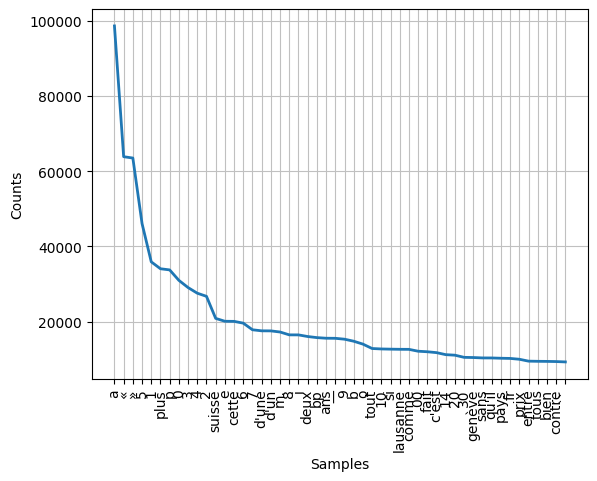

In [35]:
_ = freq.plot(50, cumulative=False)

### 2.2.2  Lemmatisation

Le processus de « [**lemmatisation**](https://fr.wikipedia.org/wiki/Lemmatisation) » consiste à représenter les mots (ou [lemmes](https://fr.wikipedia.org/wiki/Lemme_(linguistique)) en linguistique) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. On ne **conserve que le sens des mots** utilisés dans le corpus. 


In [37]:
doc = nlp("Malgré les circonstances, les citoyens étaient déterminés à défendre leurs convictions jusqu'au bout.")

for token in doc:
    print('Word:', token.text, '\t', 'Lemma:', token.lemma_) # Comment obtenir le lemme d'un mot

Word: Malgré 	 Lemma: malgré
Word: les 	 Lemma: le
Word: circonstances 	 Lemma: circonstance
Word: , 	 Lemma: ,
Word: les 	 Lemma: le
Word: citoyens 	 Lemma: citoyen
Word: étaient 	 Lemma: être
Word: déterminés 	 Lemma: déterminer
Word: à 	 Lemma: à
Word: défendre 	 Lemma: défendre
Word: leurs 	 Lemma: leur
Word: convictions 	 Lemma: conviction
Word: jusqu' 	 Lemma: jusque
Word: au 	 Lemma: au
Word: bout 	 Lemma: bout
Word: . 	 Lemma: .


**<span style="color:red">To do</span>**:

> * Ecrivez une méthode de prétraitement qui effectue également la lemmatisation. Utilisez [```spaCy```](https://spacy.io/usage/linguistic-features#lemmatization/) pour la tokenisation, et supprimez les mots vides et punctuation (`spacy_stopwords + punctuation`), et tous les autres **tokens** qui, selon vous, nuiront à la précision des algorithmes d'apprentissage automatique (nombres ? ponctuation ? Etc.)


In [ ]:
def preprocess_with_lemmatisation(phrase):
    
    phrase = phrase.lower() # minuscule
    
    
    tokens = []
    
    tokens = [token.lemma_.replace('\n', '').strip() for token in nlp(phrase) 
             if token.text.lower() not in spacy_stopwords + punctuation]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text_with_lemmatisation'] = data['text'].progress_apply(preprocess_with_lemmatisation)

In [ ]:
data.head()

In [ ]:
print(data['cleaned_text'][0])

In [ ]:
print(data['cleaned_text_with_lemmatisation'][0])


### 2.2.3 Racinisation

Un autre processus, la [**racinisation**](https://fr.wikipedia.org/wiki/Racinisation) (ou *stemming* en anglais) a une approche similaire. Cela consiste à ne conserver que la racine des mots étudiés : on supprime suffixes, préfixes et autres afin de ne conserver que la racine. 

In [38]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

La **racinisation** va tronquer les mots, par exemple comme ci-dessous :

In [ ]:
doc = nlp("Malgré les circonstances, les citoyens étaient déterminés à défendre leurs convictions jusqu'au bout.")
for token in doc:
    print('Word:', token.text, '\t', 'Lemma:', stemmer.stem(token.text))

In [40]:
def preprocess_with_stemming(phrase):
    
    phrase = phrase.lower()
    
    tokens = [stemmer.stem(token.text) for token in nlp(phrase) 
             if token.text.lower() not in spacy_stopwords + punctuation]
    
    tokens = [token for token in tokens if len(token) > 0]
    
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None


data['cleaned_text_with_stemming'] = data['text'].progress_apply(preprocess_with_stemming)

In [ ]:
data.head()

# 4. Representation des mots


## 4.1 « *bag of words* » (sac de mots)

L’**extraction d’information** est l’étape qui suit le **nettoyage** du corpus. Pour ce faire, il nous faut changer la représentation du texte pour qu’il puisse être utilisé par un modèle statistique, et pour pouvoir l’exploiter.

Une représentation **bag-of-words** classique sera donc celle dans laquelle on représente chaque document par un vecteur de la taille du vocabulaire $|V|$. On utilisera la matrice composée de l’ensemble de ces $N$ documents qui forment le corpus comme entrée de nos algorithmes.

Nous allons voir comment cela fonctionne et imprimer les mots les plus pertinents à l’aide de la classe [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) de `scikit-learn`.

Ceci est juste un petit exemple avec les documents de 110 à 130 (problèmes de ressources mémoire).


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(np.hstack(data['cleaned_text'][110:130]))

X = vectorizer.transform(np.hstack(data['cleaned_text'][110:130])) # 

weights = np.asarray(X.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

## 4.1 « *TF-IDF* » (*Term-Frequency* − *Inverse Document Frequency*)

Ce que nous désirons faire avec [**TF-IDF**](https://fr.wikipedia.org/wiki/TF-IDF) est de mettre en application ce qui est décrit précédemment. Nous voulons pondérer la fréquence d’apparition d’un lemme dans un document par rapport à son apparition dans l’ensemble des documents du corpus. La fréquence de chaque lemme est donc pondérée à l’ensemble du corpus.

En l’occurence, la métrique **TF-IDF** (*Term-Frequency* − *Inverse Document Frequency*) utilise comme indicateur de similarité l’*inverse document frequency* qui est l’inverse de la proportion de document qui contient le terme, à l'échelle logarithmique.

Nous calculons donc le poids **TF-IDF** final attribué au n-gramme :

$tfidf_{i,j} = tf_{i,j} × idf_{i}$

Pour connaître les termes qui représentent le plus un document, nous allons utiliser la [fonction **TF-IDF**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de `scikit-learn`.


**Note :** nous traitons des *n-grames*, donc utilisez le paramètre [`ngram_range`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de la classe [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) lors de son instanciation.

**Note :** pour transformer vos vecteurs résultats (obtenus par appel à `fit_transform`) en des données utilisables dans un `DataFrame`, vous devez utiliser `vectors.toarray()`. À la création de votre `DataFrame`, nommez les colonnes avec le nom des lemmes utilisés (ce sont les *features* de l’opération, vous pouvez les récupérer avec `get_feature_names()`).

**Note :** comment on renverse une matrice ? En demandant sa transposée. Pour la transposée d’un `pd.DataFrame`, on accède simplement l’attribut `T` du `pd.DataFrame`.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,10))
vectors = vectorizer.fit_transform(np.hstack(data['cleaned_text']))#[110:130]

weights = np.asarray(vectors.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

### 4. 2 Plongements de mots (Word Embeddings)

La dernière répresentation des mots que nous analyserons est la répresentation **word embeddings**. 
Les **plongements de mots** (ou *word embedding*) est une technique d'apprentissage et de représentation de mots d’un texte. Elle consiste à représenter les mots sous forme de vecteurs de nombres réels qui ont la particularité d’être proches (dans leurs espaces vectoriels) si leurs contextes sont similaires.

Ils peuvent être générés de plusieurs façons, comme les [réseaux de neuronnes](https://www.tensorflow.org/tutorials/text/word_embeddings) ou les matrices de [cooccurences](https://fr.wikipedia.org/wiki/Cooccurrence), des modèles probabilistes (TF-IDF vecteurs), etc.

Cette nouvelle représentation a ceci de particulier que les mots apparaissant dans des contextes similaires possèdent des vecteurs correspondants qui sont relativement proches. Par exemple, on pourrait s'attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l'espace vectoriel où sont définis ces vecteurs. Cette technique est basée sur l'hypothèse qui veut que les mots apparaissant dans des contextes similaires ont des significations apparentées. 

<figure>
    <center>
    <img src="images/we.png" width="300" height="400">
    <figcaption>Source: <a href="https://unbabel.com/blog/fr/lia-vous-parle-mais-comprend-elle-ce-quelle-dit/"> link</a></figcaption>
    </center>
</figure>

Différents  plongements (embeddings) de mots qui ont été entrainées sur de grands ensembles de données et disponibles :

*  [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec Google News](https://code.google.com/archive/p/word2vec/)
* [GloVe](https://nlp.stanford.edu/projects/glove/)
* [FastText](https://github.com/facebookresearch/fastText)


Le word embedding d'un mot peut être récupérée en utilisant la bibliothèque **spaCy** (cette bibliothèque utilise le modèle [GloVe](https://nlp.stanford.edu/projects/glove/)).


In [ ]:
token = nlp("climat")
token, token.vector.shape, token.vector

**spaCy** est capable de comparer deux mots et de faire une prédiction de leur similitude. La prédiction de la similarité est utile pour créer des systèmes de recommandation ou pour signaler les doublons. Par exemple, vous pouvez suggérer un contenu similaire à ce que l'utilisateur recherche actuellement ou étiqueter un ticket d'assistance comme doublon s'il est très similaire à un ticket déjà existant.

Chaque **Doc**, **Span** et **Token** est livré avec une **.similarity()** méthode qui vous permet de le comparer avec un autre objet et de déterminer la similitude. Bien sûr, la similitude est toujours subjective - si «chien» et «chat» sont similaires dépend vraiment de la façon dont vous le regardez. Le modèle de similarité de **spaCy** suppose généralement une définition assez générale de la similitude.

Généralement, ene fois que nous aurons des vecteurs du texte donné, pour calculer la similitude entre les vecteurs générés, des méthodes statistiques pour la similitude vectorielle peuvent être utilisées. Ces techniques sont la *similitude cosinus*, la *distance euclidienne*, la *distance de Jaccard*, la distance *word mover*. La *similitude cosinus* est la technique qui est largement utilisée pour la similitude de texte (**spaCy** utilise cette similitude).


In [ ]:
token = nlp('climat')
for word in ['climat', 'réchauffement', 'réchauffe', 'climatique', 'météo']:
    word = nlp(word)
    print('climat', '~', word, ':', token.similarity(word))

Pour voir l'exemple de la figure présentée précédemment, nous calculons la distance entre tous les mots * spaCy * pour trouver les mots les plus similaires pour le calcul: **king − man + woman ≈ queen**

In [ ]:
from scipy import spatial
 
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
 
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector
 
# Nous devons maintenant trouver le vecteur le plus proche du vocabulaire du résultat de "man" - "woman" + "queen"
maybe_king = man - woman + queen
computed_similarities = []
 
for word in nlp.vocab:
    # Ignorer les mots sans vecteurs
    if not word.has_vector:
        continue

    similarity = cosine_similarity(maybe_king, word.vector)
    computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print('man - woman + queen=', [w[0].text for w in computed_similarities[:5]])